# Lead Scoring

In [539]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [540]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import xticks

In [541]:
# Display all columns
pd.set_option('display.max_columns',200)

## Reading and Understanding the Data

In [542]:
# Read the csv file using 'read_csv'.
leads = pd.read_csv("Leads.csv")

Inspect the various aspects of the dataframe

In [543]:
# Check the head of the dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [544]:
# Check the number of rows and columns in the dataframe
leads.shape

(9240, 37)

In [545]:
# Types of all columns
leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [546]:
# Check the summary for the numeric columns 
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [547]:
# Count the number of null values in each column
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## Data Cleaning

In [548]:
# Percentage of null values in each column
null_percentage = leads.isnull().sum() * 100 / len(leads)

In [549]:
# Top columns have highest percentages of null values
null_percentage.sort_values(ascending = False).head(50)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

From the list above, it can be seen that there are 7 columns having null values more than ~30%.These columns need to be removed

### Dealing with missing data variables

In [550]:
# List all of the columns having null values more than 30%
null_columns = null_percentage[null_percentage.values > 30].index
print(null_columns)

Index(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [551]:
# Remove those columns
leads.drop(null_columns, axis=1, inplace=True)

In [552]:
# List of remaining columns which have null values
null_percentage = leads.isnull().sum() * 100 / len(leads)
null_percentage[null_percentage>0].sort_values(ascending = False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

In [553]:
# Check the number of rows and columns in the dataframe
leads.shape

(9240, 31)

### Examine other columns

In [554]:
# Read the "Country" column to see what values it have
leads["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

Country seems not adding any values -> Drop them

In [555]:
# Remove Country
leads.drop("Country", axis=1, inplace=True)

In [556]:
# Drop City as well
leads.drop("City", axis=1, inplace=True)

In [557]:
# View values of all columns
for column_name, column_data in leads.iteritems():
    print(f"Column: {column_name}")
    if column_data.dtype == 'object':
        # For categorical columns, display value counts
        value_counts = column_data.value_counts()
        display_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})
        print(display_df.to_string(index=False))
    else:
        # For numerical columns, display summary statistics
        summary = column_data.describe()
        print(summary)

    print("\n========================\n")

Column: Prospect ID
                               Value  Count
7927b2df-8bba-4d29-b9a2-b6e0beafe620      1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea      1
46befc49-253a-419b-abea-2fd978d2e2b1      1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a      1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5      1
446a290f-b78f-413b-8912-d9c79a847e3a      1
38826741-ffe2-4d37-89c4-1140c66c5560      1
f08604ae-a2fa-4d64-8a42-a95ff2bddfed      1
ce9c2fa0-d2ff-493d-82a9-20c81b175b3e      1
13e3716d-528a-4e90-a441-51ab1d0184d1      1
0047124c-2a76-4c2d-b4e4-83cb2331dbec      1
9608eda6-d8bb-45ec-ab12-eb3c49d52b0f      1
07a52472-4b5d-446f-9048-ffdc7bc65e96      1
804e0cfb-559d-4a63-a635-573f7cfdf441      1
65954c34-8ce7-4d9b-8ae0-f15f15bc9055      1
e02efa11-5bf6-40ee-9194-75d3fffef1d3      1
297fd0fa-69e5-49cf-b794-94c103e388d7      1
f4217ab4-81fd-42d9-a9b4-f8bbfaf1578b      1
b3af7901-09d8-49b7-803f-1cd1e1e8878a      1
7bcca8a9-60ab-4a36-a7f9-cd85aeb10a70      1
13931a86-7053-4522-af99-9e6ae1a6e9b8      1
a303766c-f68

**Insights**

1. "How did you hear about X Education" and "Lead Profile" columns contain a significant number of "Select" values. It is advisable to remove these rows as they do not provide meaningful information.

2. The "Magazine" column has the same value across all rows, making it uninformative. Therefore, it should be dropped from the dataset.

3. Similar to the "Magazine" column, other columns such as "Search," "Newspaper Article," "X Education Forums," "Newspaper," "Digital Advertisement," "Through Recommendations," "Receive More Updates About Our Courses," "Update me on Supply Chain Content," "Get updates on DM Content," "I agree to pay the amount through cheque," and "What matters most to you in choosing a course" can also be dropped from the dataset as they do not provide valuable insights.

In [558]:
# Drop "Specialization", "How did you hear about X Education", "Lead Profile"
leads.drop(["How did you hear about X Education", "Lead Profile"], axis=1, inplace=True)

In [559]:
# Looking for columns still having "Collect" values
yes_col = leads.columns[      
    (leads == "Collect")        # mask 
    .any(axis=0)     # mask
].values.tolist()

yes_col

[]

In [560]:
# Drop "Magazine","Search", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "What matters most to you in choosing a course"
leads.drop(["Magazine","Search", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "What matters most to you in choosing a course"], axis=1, inplace=True)

In [561]:
# List of remaining columns which have null values
null_percentage = leads.isnull().sum() * 100 / len(leads)
null_percentage[null_percentage>0].sort_values(ascending = False)

What is your current occupation    29.112554
Specialization                     15.562771
TotalVisits                         1.482684
Page Views Per Visit                1.482684
Last Activity                       1.114719
Lead Source                         0.389610
dtype: float64

In [562]:
# Read the "What is your current occupation" column to see what values it have
leads["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [563]:
# Drop the null rows of "What is your current occupation"
leads = leads[~pd.isnull(leads["What is your current occupation"])]

In [564]:
# Check the number of rows and columns in the dataframe
leads.shape

(6550, 15)

In [565]:
# List of remaining columns which have null values
leads.isnull().sum().sort_values(ascending = False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [566]:
# Define the columns for which you want to drop null rows
columns_to_check = ["TotalVisits", "Page Views Per Visit", "Last Activity", "Lead Source"]

# Drop null rows for the specified columns
leads = leads.dropna(subset=columns_to_check)

# Reset the index of the DataFrame after dropping rows
leads.reset_index(drop=True, inplace=True)


In [567]:
# List of remaining columns which have null values
leads.isnull().sum().sort_values(ascending = False)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Do Not Call                                0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [568]:
# Check the number of rows and columns in the dataframe
leads.shape

(6391, 15)

### Dealing with invalid and unnecessary data

In [569]:
# Recall the total number of columns
leads.shape

(6391, 15)

In [570]:
# Types of all columns
leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6391 entries, 0 to 6390
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             6391 non-null   object 
 1   Lead Number                             6391 non-null   int64  
 2   Lead Origin                             6391 non-null   object 
 3   Lead Source                             6391 non-null   object 
 4   Do Not Email                            6391 non-null   object 
 5   Do Not Call                             6391 non-null   object 
 6   Converted                               6391 non-null   int64  
 7   TotalVisits                             6391 non-null   float64
 8   Total Time Spent on Website             6391 non-null   int64  
 9   Page Views Per Visit                    6391 non-null   float64
 10  Last Activity                           6391 non-null   obje

Based on the provided information, it appears that there are no columns with inappropriate data types, and there is no "Date_of_birth" or "Birthday" column to check for DATE TIME type. This suggests that the existing data types in the dataset are suitable and do not require any adjustments or conversions.

In [571]:
# Read the "Prospect ID" column to see what values it have
leads["Prospect ID"].value_counts()

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
6b7a649d-69fc-4420-bdfb-f4088fbcaffa    1
a87ca646-972f-4a98-9b25-3b68cff8d093    1
c7cc4b98-b373-48c1-bede-d2c81470f4cc    1
4fff8461-bba2-48f8-8827-0c3100ad618e    1
                                       ..
4a1940f6-a8d2-4b24-917f-9c4853857db2    1
a7a628ed-a406-4bdd-b244-e2c7176ee8b3    1
7e016eb1-f63e-43be-9b09-b49c1136f602    1
119e85e5-5838-4e6a-a3d6-4393f7cfb12c    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 6391, dtype: int64

Prospect ID has characters in its value => object type is correct.

In [572]:
# Read the "Lead Source" column to see what values it have
leads["Lead Source"].value_counts()

Google               2048
Direct Traffic       1891
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: Lead Source, dtype: int64

In [573]:
# Replace "google" with "Google"
leads["Lead Source"].replace({"google": "Google"}, inplace=True)

In [574]:
# Read the "Lead Source" column to see what values it have
leads["Lead Source"].value_counts()

Google               2048
Direct Traffic       1891
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: Lead Source, dtype: int64

In [575]:
# Read the "Lead Number" column to see what values it have
leads["Lead Number"].value_counts()

660737    1
600997    1
601038    1
601039    1
601052    1
         ..
629414    1
629447    1
629449    1
629451    1
579533    1
Name: Lead Number, Length: 6391, dtype: int64

In [576]:
# Drop "Lead Number"
leads.drop(columns=["Lead Number"],inplace=True)

## Visualising the Data

In [577]:
# Check columns types
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6391 entries, 0 to 6390
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             6391 non-null   object 
 1   Lead Origin                             6391 non-null   object 
 2   Lead Source                             6391 non-null   object 
 3   Do Not Email                            6391 non-null   object 
 4   Do Not Call                             6391 non-null   object 
 5   Converted                               6391 non-null   int64  
 6   TotalVisits                             6391 non-null   float64
 7   Total Time Spent on Website             6391 non-null   int64  
 8   Page Views Per Visit                    6391 non-null   float64
 9   Last Activity                           6391 non-null   object 
 10  Specialization                          6373 non-null   obje

In [578]:
# Convert numeric values into categorical string values
leads['Converted'] = leads['Converted'].map({1: 'Yes', 0: 'No'})

### Visualising Numeric Variables

In [579]:
# Check columns types
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6391 entries, 0 to 6390
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             6391 non-null   object 
 1   Lead Origin                             6391 non-null   object 
 2   Lead Source                             6391 non-null   object 
 3   Do Not Email                            6391 non-null   object 
 4   Do Not Call                             6391 non-null   object 
 5   Converted                               6391 non-null   object 
 6   TotalVisits                             6391 non-null   float64
 7   Total Time Spent on Website             6391 non-null   int64  
 8   Page Views Per Visit                    6391 non-null   float64
 9   Last Activity                           6391 non-null   object 
 10  Specialization                          6373 non-null   obje

In [580]:
# describe gives all numerical cols summary
leads.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6391.000000,6391.000000,6391.000000
mean,3.620091,535.018776,2.477859
std,5.042908,565.084312,2.165296
min,0.000000,0.000000,0.000000
25%,1.000000,34.500000,1.000000
50%,3.000000,287.000000,2.000000
75%,5.000000,1021.500000,3.500000
max,251.000000,2272.000000,55.000000


In [581]:
# Show all numerical columns
leads.describe().columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [582]:
leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6391 entries, 0 to 6390
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TotalVisits                  6391 non-null   float64
 1   Total Time Spent on Website  6391 non-null   int64  
 2   Page Views Per Visit         6391 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 149.9 KB


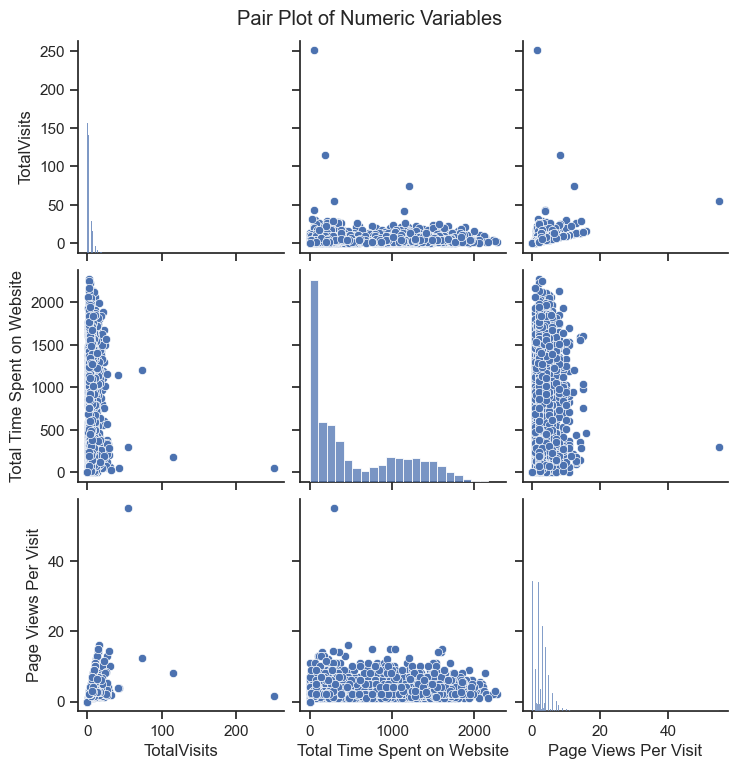

In [583]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only numeric columns
numeric_columns = leads.select_dtypes(include=['number'])

# Create a pair plot
sns.set(style="ticks")
sns.pairplot(numeric_columns)
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)  # Add a title
plt.show()

In [584]:
# Correlation between numeric variables
cor = leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr()
cor

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
TotalVisits,1.000000,0.202542,0.489355
Total Time Spent on Website,0.202542,1.000000,0.303613
Page Views Per Visit,0.489355,0.303613,1.000000


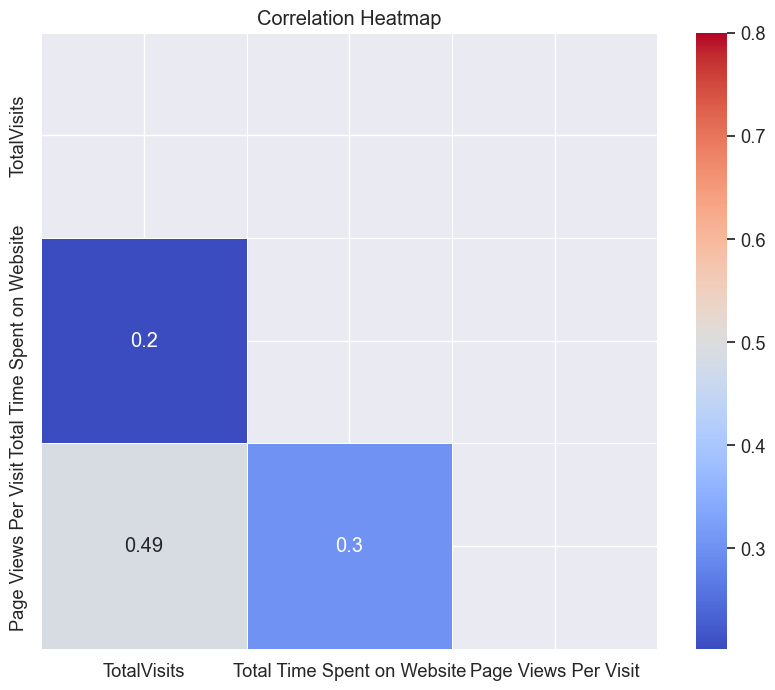

In [585]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
cor = leads.corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(cor, dtype=bool))

# Set up the figure
plt.figure(figsize=(10, 8))

# Customize the heatmap
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cor, mask=mask, cmap="coolwarm", vmax=0.8, square=True, annot=True, linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

Insights:
- No multicollinear relationship

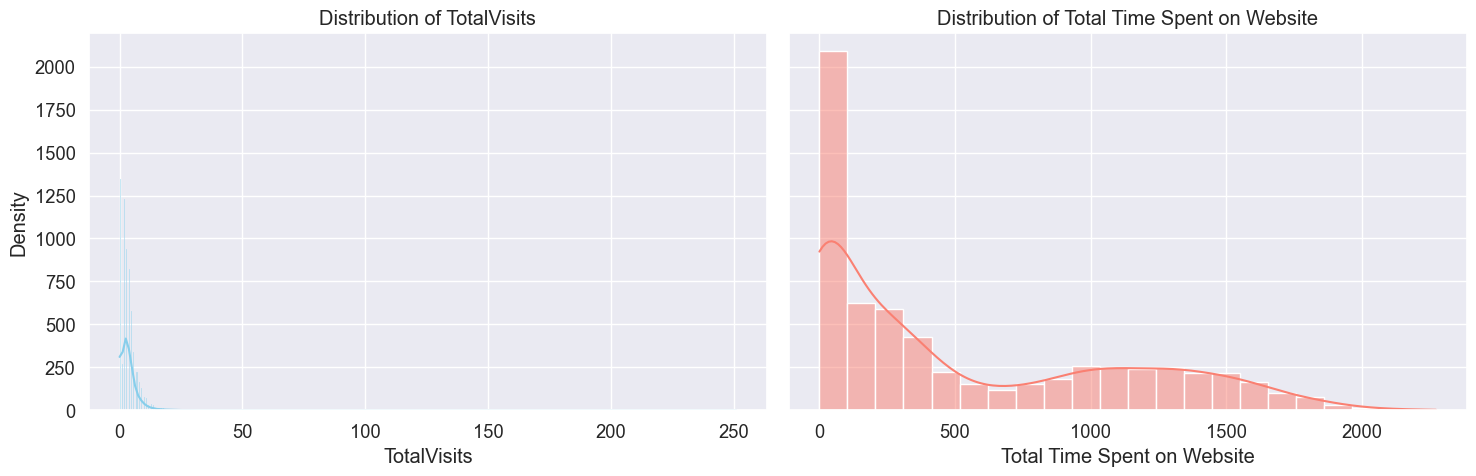

Summary Statistics for 'TotalVisits':
count    6391.000000
mean        3.620091
std         5.042908
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

Summary Statistics for 'Total Time Spent on Website':
count    6391.000000
mean      535.018776
std       565.084312
min         0.000000
25%        34.500000
50%       287.000000
75%      1021.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


In [586]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with a shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot the distribution of 'TotalVisits'
sns.histplot(leads['TotalVisits'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of TotalVisits')
axes[0].set_xlabel('TotalVisits')
axes[0].set_ylabel('Density')

# Plot the distribution of 'Total Time Spent on Website'
sns.histplot(leads['Total Time Spent on Website'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Total Time Spent on Website')
axes[1].set_xlabel('Total Time Spent on Website')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Provide insights
total_visits_stats = leads['TotalVisits'].describe()
total_time_stats = leads['Total Time Spent on Website'].describe()

print("Summary Statistics for 'TotalVisits':")
print(total_visits_stats)
print("\nSummary Statistics for 'Total Time Spent on Website':")
print(total_time_stats)


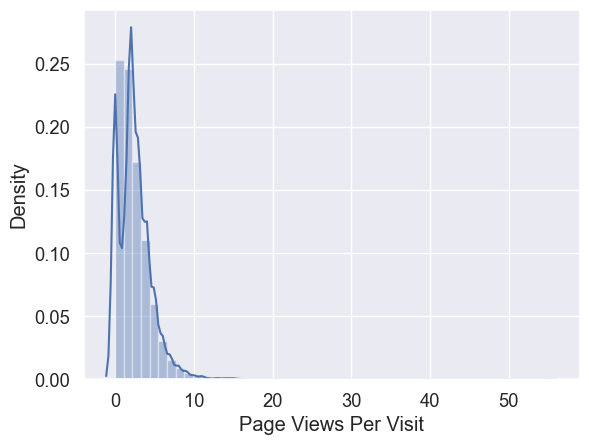

In [587]:
# distplot for 'Page Views Per Visit' -> Provide insights
sns.distplot(leads['Page Views Per Visit'])
plt.show()

Insights from the data analysis:

1. Visitor Frequency:
   - The majority of customers visited the website fewer than 20 times. This indicates that a significant portion of the customer base consists of infrequent visitors.

2. Page Views per Visit:
   - A large proportion of customers viewed less than 5 pages per visit. This suggests that many visitors may have specific content or tasks in mind, leading to shorter browsing sessions.

3. Total Time Spent on the Website:
   - Most customers spent less than 2,000 units of time (minutes or seconds) in total on the website. This indicates that the majority of visitors had relatively short engagement durations on the website.

These insights provide an overview of customer behavior on the website, highlighting trends in visitor frequency, page views, and time spent, which can be valuable for tailoring marketing strategies and website content to better meet customer needs.

### Visualising Categorical Variables

In [588]:
# Types of all columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6391 entries, 0 to 6390
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             6391 non-null   object 
 1   Lead Origin                             6391 non-null   object 
 2   Lead Source                             6391 non-null   object 
 3   Do Not Email                            6391 non-null   object 
 4   Do Not Call                             6391 non-null   object 
 5   Converted                               6391 non-null   object 
 6   TotalVisits                             6391 non-null   float64
 7   Total Time Spent on Website             6391 non-null   int64  
 8   Page Views Per Visit                    6391 non-null   float64
 9   Last Activity                           6391 non-null   object 
 10  Specialization                          6373 non-null   obje

In [589]:
# Find all the categorical variables in the dataset
df_categorical = leads.select_dtypes(exclude=['float64','int64'])
df_categorical.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**Pie plot for categorical variables**

In [590]:
import matplotlib.pyplot as plt

def plot_univariate_pie(variable, data):
    # Filter data for "No" (Non-Converted) and "Yes" (Converted) cases
    non_converted_data = data[data["Converted"] == "No"]
    converted_data = data[data["Converted"] == "Yes"]

    # Plot on a pie chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    # Not Converted
    data_0 = non_converted_data[variable].value_counts()
    labels_0 = data_0.index
    ax1.pie(data_0, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.set_title('Non-Converted')
    ax1.legend(labels_0, loc="best")

    # Converted
    data_1 = converted_data[variable].value_counts()
    labels_1 = data_1.index
    ax2.pie(data_1, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax2.set_title('Converted')
    ax2.legend(labels_1, loc="best")

    plt.suptitle(f'Distribution of {variable} by Conversion', fontsize=16)
    plt.show()

# Example usage:
# plot_univariate_pie('Lead Source', leads)

**Countplot for categorical variables**

In [591]:
import seaborn as sns
import matplotlib.pyplot as plt

def countplot(data, variable, hue_variable="Converted", rotation=90):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=variable, hue=hue_variable, data=data)
    plt.xticks(rotation=rotation)
    plt.title(f'Countplot of {variable} by {hue_variable}')
    plt.show()

# Example usage:
# countplot(leads, 'Lead Source')


In [592]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_two_countplots(data, variable_1, variable_2, hue_variable="Converted", rotation=90):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.countplot(x=variable_1, hue=hue_variable, data=data, ax=axes[0])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=rotation)
    axes[0].set_title(f'Countplot of {variable_1} by {hue_variable}')
    
    sns.countplot(x=variable_2, hue=hue_variable, data=data, ax=axes[1])
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=rotation)
    axes[1].set_title(f'Countplot of {variable_2} by {hue_variable}')
    
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_two_countplots(leads, 'Lead Source', 'Lead Profile')

**Lead Origin**

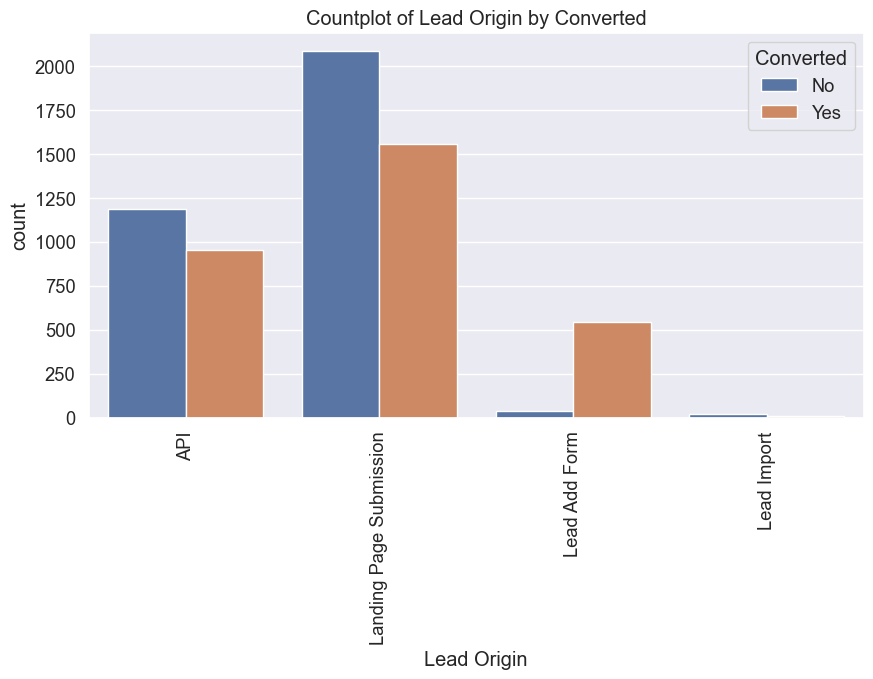

In [593]:
# Countplot for categorical variables
countplot(leads,'Lead Origin')

**Lead Source**

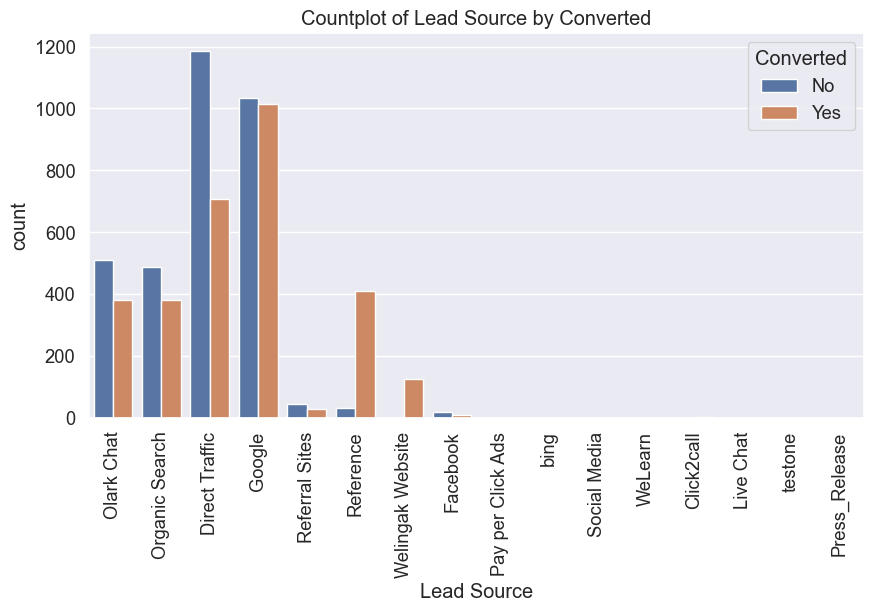

In [594]:
# Countplot for categorical variables
countplot(leads,'Lead Source')

There are very few customers coming from blog, Pay per Click Ads, bing, Social Media, WeLearn, Click2call, Live Chat, welearnblog_Home, youtubechannel, testone, Press_Release, NC_EDM => Will replace those with "Others".

In [595]:
# Replace blog, Pay per Click Ads, bing, Social Media, WeLearn, Click2call, Live Chat, welearnblog_Home, youtubechannel, testone, Press_Release, NC_EDM with "others"
leads['Lead Source'] = leads['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'], 'Others')

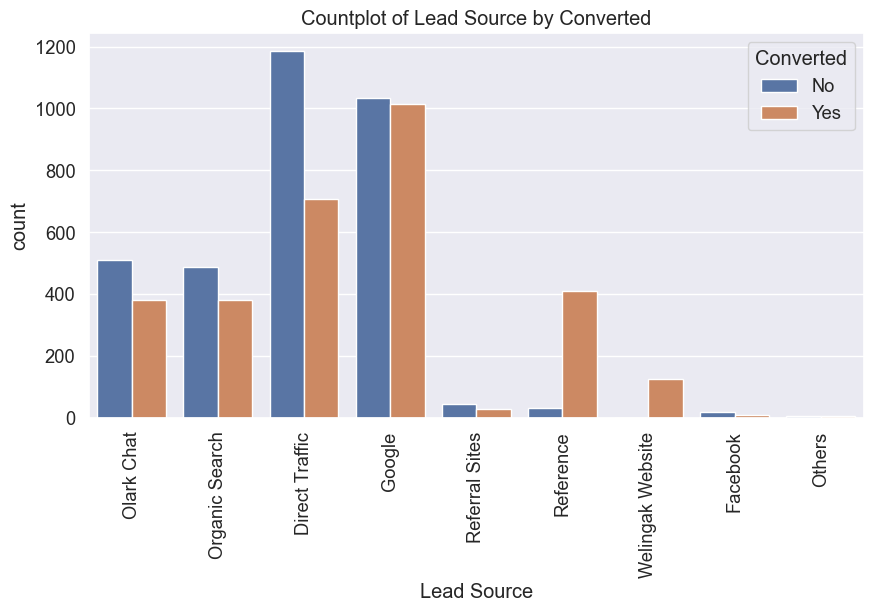

In [596]:
# Countplot for categorical variables
countplot(leads,'Lead Source')

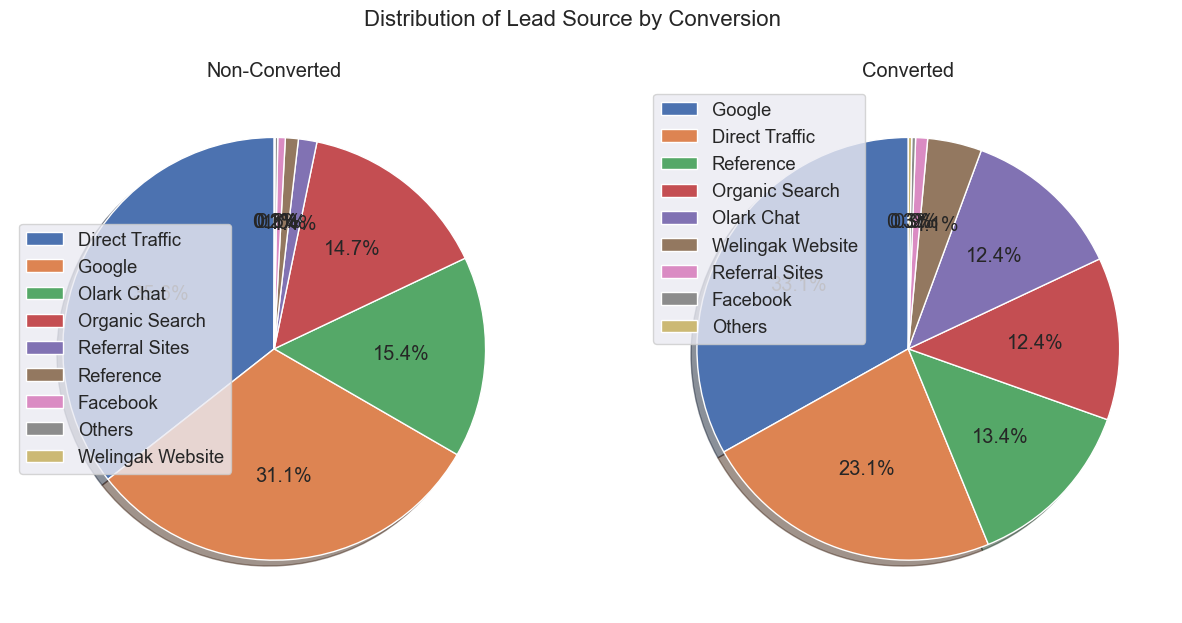

In [597]:
# Pie plot
plot_univariate_pie('Lead Source',leads)

**Do not email & Do not call**

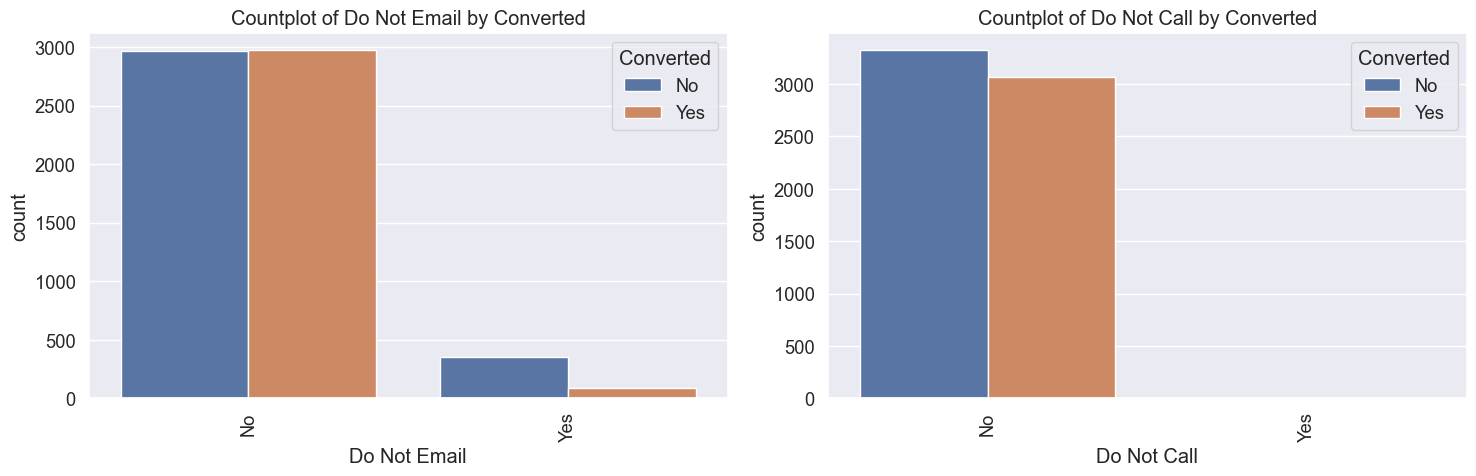

In [598]:
# Countplot for categorical variables
plot_two_countplots(leads,'Do Not Email', 'Do Not Call')

**Last activity & Last notable activity**

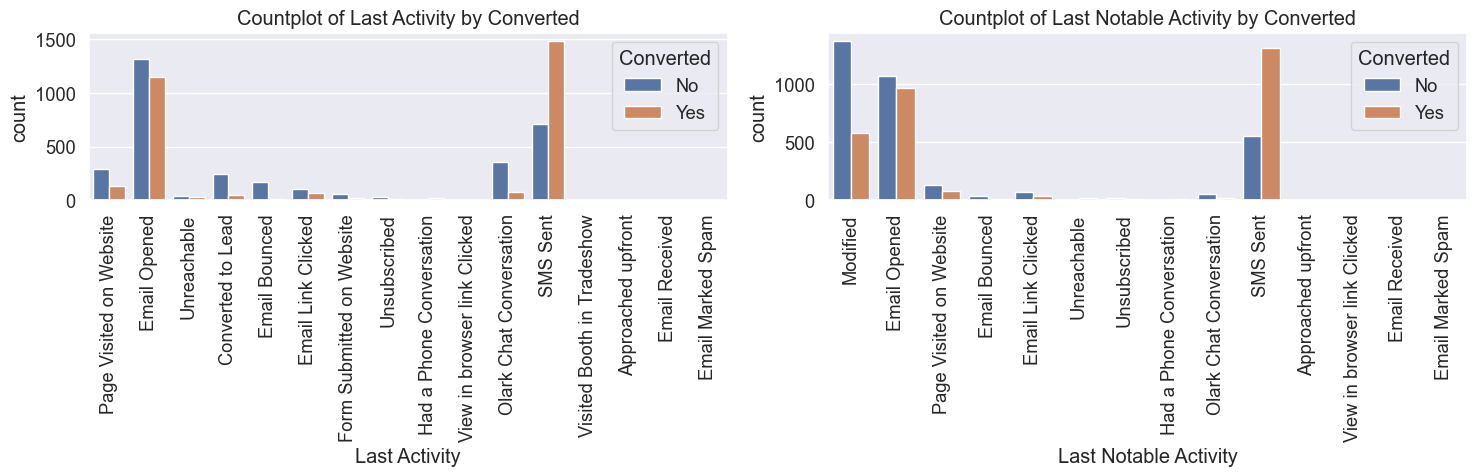

In [599]:
# Countplot for categorical variables
plot_two_countplots(leads,'Last Activity', 'Last Notable Activity')

**Occupation**

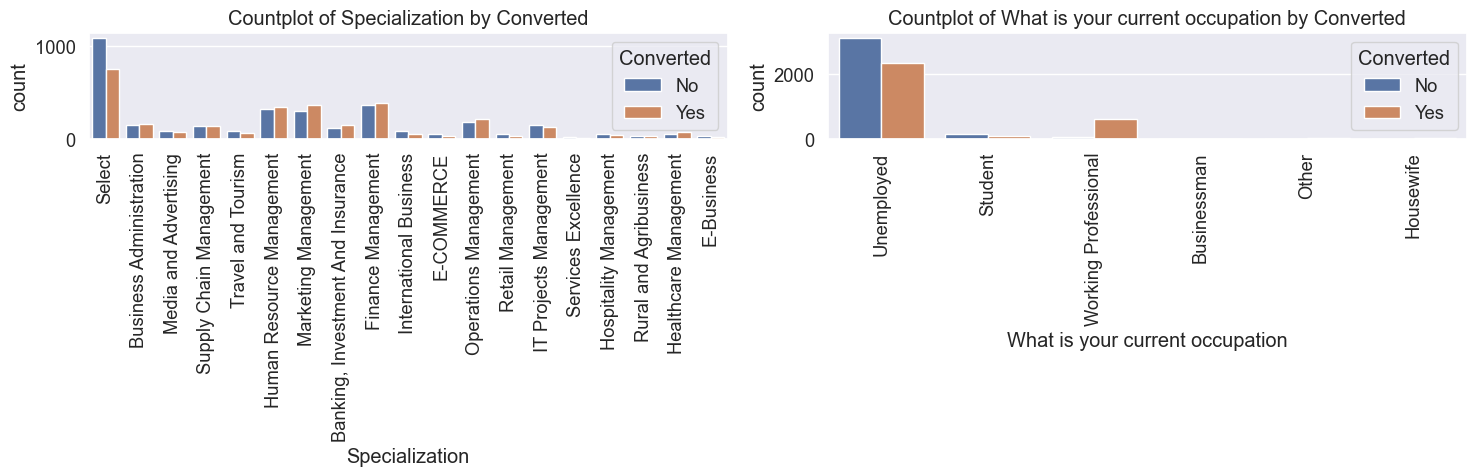

In [600]:
# Countplot for categorical variables
plot_two_countplots(leads,'Specialization', 'What is your current occupation')

**A free copy of Mastering The Interview**

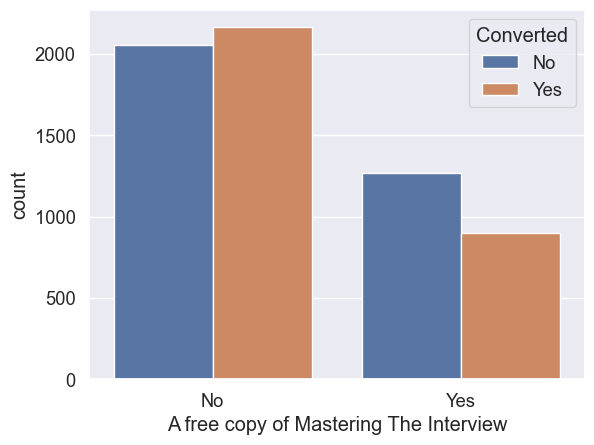

In [601]:
# Countplot for categorical variables
sns.countplot(x = 'A free copy of Mastering The Interview', hue = "Converted", data = leads)
plt.show()

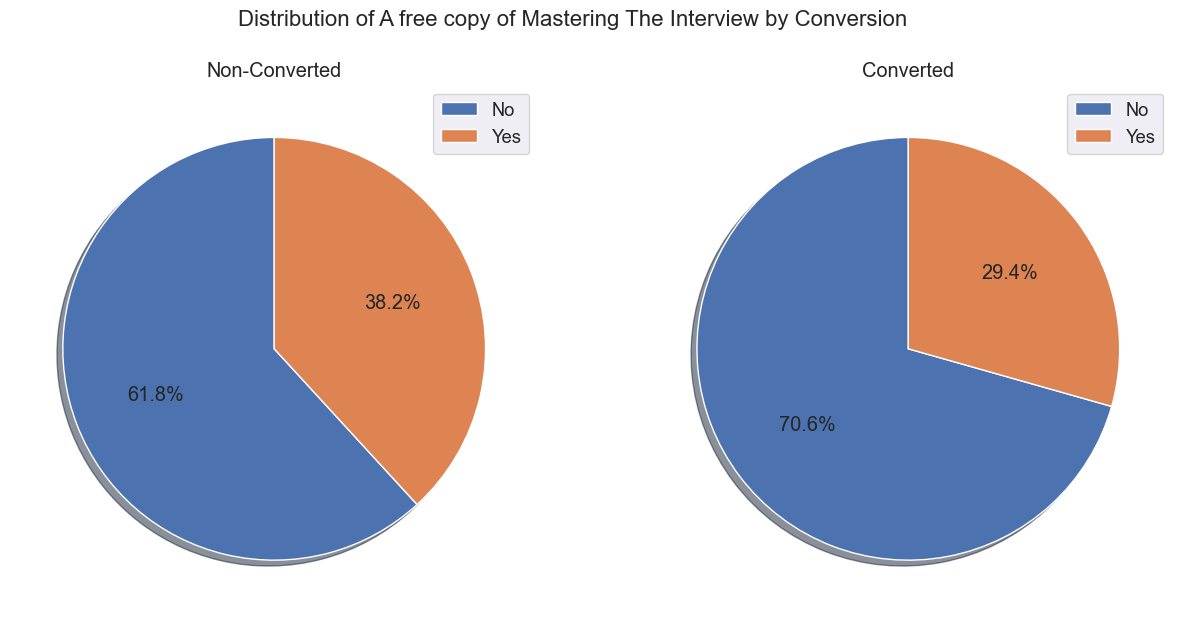

In [602]:
# Pie plot
plot_univariate_pie("A free copy of Mastering The Interview",leads)

Insights from the data analysis:

1. Lead Origin:
   - The majority of customers were identified as leads through three primary sources: API, Landing Page Submission, and Lead Add Form. Among these, Lead Add Form appears to be the most reliable identifier for determining converted customers.

2. Traffic Sources:
   - The predominant sources of website traffic are Google and Direct Traffic. Interestingly, "Reference" and "Welingak Website" sources have a higher proportion of converted customers compared to non-converted customers, suggesting their effectiveness in driving conversions.

3. Contact Preferences:
   - A significant number of customers, whether converted or not, have selected "Do not call" and "Do not email" as their contact preferences, indicating a preference for limited communication.

4. Last Activity:
   - For converted customers, the last activity and last notable activity tend to be "Sent SMS," while for non-converted customers, the last activity is often "Opened Email." This suggests different engagement patterns for these two groups.

5. Employment Status:
   - The majority of customers are unemployed, indicating a potential market segment that may require tailored marketing approaches.

6. Specialization:
   - Most customers did not choose a specialization, while those who did primarily work in management fields. This information can be used to refine marketing strategies and course offerings.

7. Interest in Free Copy:
   - Most customers, both converted and non-converted, do not express interest in receiving a free copy of "Mastering The Interview." This preference is consistent across both groups.

These insights provide valuable information for marketing and sales teams to refine their strategies and target the most promising leads effectively.

## Data Preparation for modelling

### Converting  binary variables (Yes/No) to 0/1

In [603]:
# All columns
leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6391 entries, 0 to 6390
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             6391 non-null   object 
 1   Lead Origin                             6391 non-null   object 
 2   Lead Source                             6391 non-null   object 
 3   Do Not Email                            6391 non-null   object 
 4   Do Not Call                             6391 non-null   object 
 5   Converted                               6391 non-null   object 
 6   TotalVisits                             6391 non-null   float64
 7   Total Time Spent on Website             6391 non-null   int64  
 8   Page Views Per Visit                    6391 non-null   float64
 9   Last Activity                           6391 non-null   object 
 10  Specialization                          6373 non-null   obje

In [604]:
# Looking for columns having "Yes/No" values
yes_col = leads.columns[      
    (leads == "Yes")        # mask 
    .any(axis=0)     # mask
].values.tolist()


In [605]:
# Defining the map function for Yes/No to 1/0
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads list
leads[yes_col] = leads[yes_col].apply(binary_map)

In [606]:
# View the data after converting
leads[yes_col].head()

,Do Not Email,Do Not Call,Converted,A free copy of Mastering The Interview
0,0,0,0,0
1,0,0,0,0
2,0,0,1,1
3,0,0,0,0
4,0,0,1,0


### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [607]:
# Looking for categorical variables
leads.select_dtypes(['object']).columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity'],
      dtype='object')

In [608]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [609]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [610]:
# Creating a dummy variable for "Specialization" and dropping the first one.
temp = pd.get_dummies(leads[["Specialization"]])

temp

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6386,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6387,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6388,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6389,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [611]:
# Drop the "Specialization_Select"
temp = temp.drop(['Specialization_Select'], 1)

In [612]:
# Concat temp with leads
leads = pd.concat([leads,temp], axis = 1)

In [613]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity', 'Specialization'], 1)

## Test-Train Split

In [614]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [615]:
# Putting feature variable to X
X = leads.drop(['Converted'], 1)

# Putting response variable to y
y = leads['Converted']

In [616]:
# View top rows of X
X.head()

,Prospect ID,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [617]:
# View top rows of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [618]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [619]:
# Create places to store train & test data with Prospect ID
X_train_data = X_train
X_test_data = X_test

In [620]:
# Make sure X_test_data having Prospect ID
X_test_data

,Prospect ID,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1990,b9c2c072-ca70-4b35-93f8-2bf163e717d3,0,0,4.0,1104,4.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2837,6e6db99d-9704-4550-8105-f7b1395734b5,1,0,1.0,328,1.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3958,c7442e97-037e-4065-8b7c-77e2d706ddb8,1,0,3.0,396,3.00,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4689,f51c1ea8-5a7e-4525-bd83-0a0a26560b37,1,0,9.0,157,4.50,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3463,97928454-d5cf-4fa1-bb31-c300e24cf8a0,0,0,4.0,1298,4.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618,cdd73bee-0044-47be-9d40-27c1150762a0,0,0,7.0,970,2.33,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5116,08b803d5-7770-4a15-bc7c-b2e1a46eaa52,0,0,0.0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5648,c070a6e7-c6af-4787-ac1b-bc847a8b806a,0,0,2.0,1266,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [621]:
# Make sure X_train_data having Prospect ID
X_train_data

,Prospect ID,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
338,7d95c5a0-8f74-4cc4-8bcd-9d2519c561fd,0,0,3.0,829,3.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
507,e4234e9b-1119-4b04-98b0-20db3010cac6,0,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5182,210907b2-35a4-4e0a-b893-c0467b9d7ae7,0,0,9.0,846,9.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5956,d1b1a897-16d8-4092-a72f-46c3ed1c0066,0,0,5.0,903,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5360,26c32a19-364a-4492-930d-3beaee1d72fa,0,0,1.0,186,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,98465eaa-2cb6-41e8-9004-0059b5a0d1ee,0,0,3.0,828,3.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
79,a3f6393c-fcdf-4cb4-8d29-6da3d62ae88f,0,0,7.0,1633,3.5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3927,6cfe6c76-2b41-4b37-a65e-9af08747a81f,0,0,2.0,1139,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [622]:
# Drop "Prospect ID"
X_train = X_train.drop(columns=["Prospect ID"])
X_test = X_test.drop(columns=["Prospect ID"])

## Feature Scaling

In [623]:
# Show all numerical columns
X_train.describe().columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Uns

In [624]:
# Scale features of X train set
scaler = StandardScaler()

X_train[['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism']] = scaler.fit_transform(X_train[['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
338,-0.269081,-0.014954,-0.120283,0.524169,0.267996,1.394525,0.871572,-0.314670,-0.063564,-0.063564,-0.687983,-0.406383,2.518894,-0.051865,-0.270512,-0.108453,-0.144913,-0.219721,-0.166743,-0.181729,0.0,1.262158,-0.014954,-0.119523,-0.061766,-0.268603,-0.270987,-0.713519,-0.105242,-0.071893,-0.029917,-0.014954,-0.029917,-0.047335,-0.181729,-2.458474,2.914930,-0.090075,-0.137501,0.0,1.456511,-0.014954,-0.042329,-0.663412,-0.113612,-0.190726,-0.639389,-0.059915,-0.058006,-0.014954,-0.211777,-0.229065,-0.083539,-0.120481,-0.362692,-0.141663,-0.114617,-0.338156,-0.204765,-0.145715,-0.343468,5.873670,-0.251452,-0.110544,-0.098522,-0.067018,-0.210622,-0.157297
507,-0.269081,-0.014954,-0.688818,-0.941997,-1.197183,-0.717090,-1.147352,3.177933,-0.063564,-0.063564,-0.687983,-0.406383,-0.397000,-0.051865,3.696698,-0.108453,-0.144913,-0.219721,-0.166743,-0.181729,0.0,1.262158,-0.014954,-0.119523,-0.061766,-0.268603,-0.270987,-0.713519,-0.105242,-0.071893,-0.029917,-0.014954,-0.029917,-0.047335,-0.181729,0.406756,-0.343061,-0.090075,-0.137501,0.0,1.456511,-0.014954,-0.042329,-0.663412,-0.113612,-0.190726,-0.639389,-0.059915,-0.058006,-0.014954,-0.211777,-0.229065,-0.083539,-0.120481,2.757159,-0.141663,-0.114617,-0.338156,-0.204765,-0.145715,-0.343468,-0.170251,-0.251452,-0.110544,-0.098522,-0.067018,-0.210622,-0.157297
5182,-0.269081,-0.014954,1.016788,0.554235,3.198354,1.394525,0.871572,-0.314670,-0.063564,-0.063564,-0.687983,-0.406383,2.518894,-0.051865,-0.270512,-0.108453,-0.144913,-0.219721,-0.166743,-0.181729,0.0,-0.792294,-0.014954,-0.119523,-0.061766,-0.268603,-0.270987,1.401504,-0.105242,-0.071893,-0.029917,-0.014954,-0.029917,-0.047335,-0.181729,0.406756,-0.343061,-0.090075,-0.137501,0.0,-0.68657

In [625]:
### Checking the Converted Rate
converted_rate = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted_rate

47.958066030355184

We have almost 48% converted rate

## Looking at Correlations

In [626]:
# Correlation matrix
leads.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Do Not Email,1.000000,-0.004846,-0.152299,0.026238,-0.054332,0.032842,0.047324,0.085309,-0.028936,-0.017841,-0.018169,-0.061749,-0.037656,0.027376,-0.000594,-0.036063,-0.012739,0.008724,-0.057438,0.586336,-0.035164,0.064596,-0.210003,-0.004846,-0.014856,-0.006205,-0.041442,0.059052,-0.007545,0.011983,0.270292,-0.007664,-0.003426,-0.010286,-0.000594,0.016079,0.036565,-0.048382,0.324201,-0.031525,0.064596,-0.182142,-0.003426,-0.012366,0.082552,-0.007386,0.051431,-0.007330,-0.016098,0.254895,-0.003426,-0.017106,-0.010387,0.022531,0.035447,-0.009550,0.020134,0.014173,-0.018922,0.046967,0.010677,-0.030750,0.010834,-0.013546,0.019893,0.025596,0.041866,-0.006631,0.047217
Do Not Call,-0.004846,1.000000,0.018431,0.003087,0.006450,-0.007991,-0.012690,-0.020371,0.025177,-0.001152,-0.001174,0.006808,-0.007126,-0.007023,-0.000858,0.030001,-0.001928,-0.002539,-0.003899,-0.003038,-0.002995,-0.000313,0.004215,-0.000313,-0.002017,-0.001063,0.030650,-0.004746,-0.012775,-0.001875,-0.001422,-0.000495,-0.000221,-0.000664,-0.000858,-0.003229,0.007232,-0.006090,-0.001571,-0.002341,-0.000313,-0.012106,-0.000221,-0.000799,0.026573,-0.001941,-0.003293,-0.011375,-0.001040,-0.001235,-0.000221,-0.003687,-0.003995,-0.001456,-0.001992,-0.006427,0.062180,-0.002115,-0.006030,-0.003773,-0.002609,0.022993,-0.002844,-0.004517,-0.001967,-0.001693,-0.001109,-0.003752,-0.002734
Converted,-0.152299,0.018431,1.000000,0.006424,0.312999,-0.062095,-0.092696,-0.119639,0.289106,-0.019068,-0.021000,0.022027,-0.043189,-0.033094,0.005219,0.243598,-0.023175,0.145061,-0.140018,-0.138526,-0.033053,0.018431,-0.020200,0.018431,-0.037085,0.041684,-0.163212,-0.087287,0.286881,-0.021067,-0.033984,-0.015659,-0.012009,0.039119,0.011691,-0.04

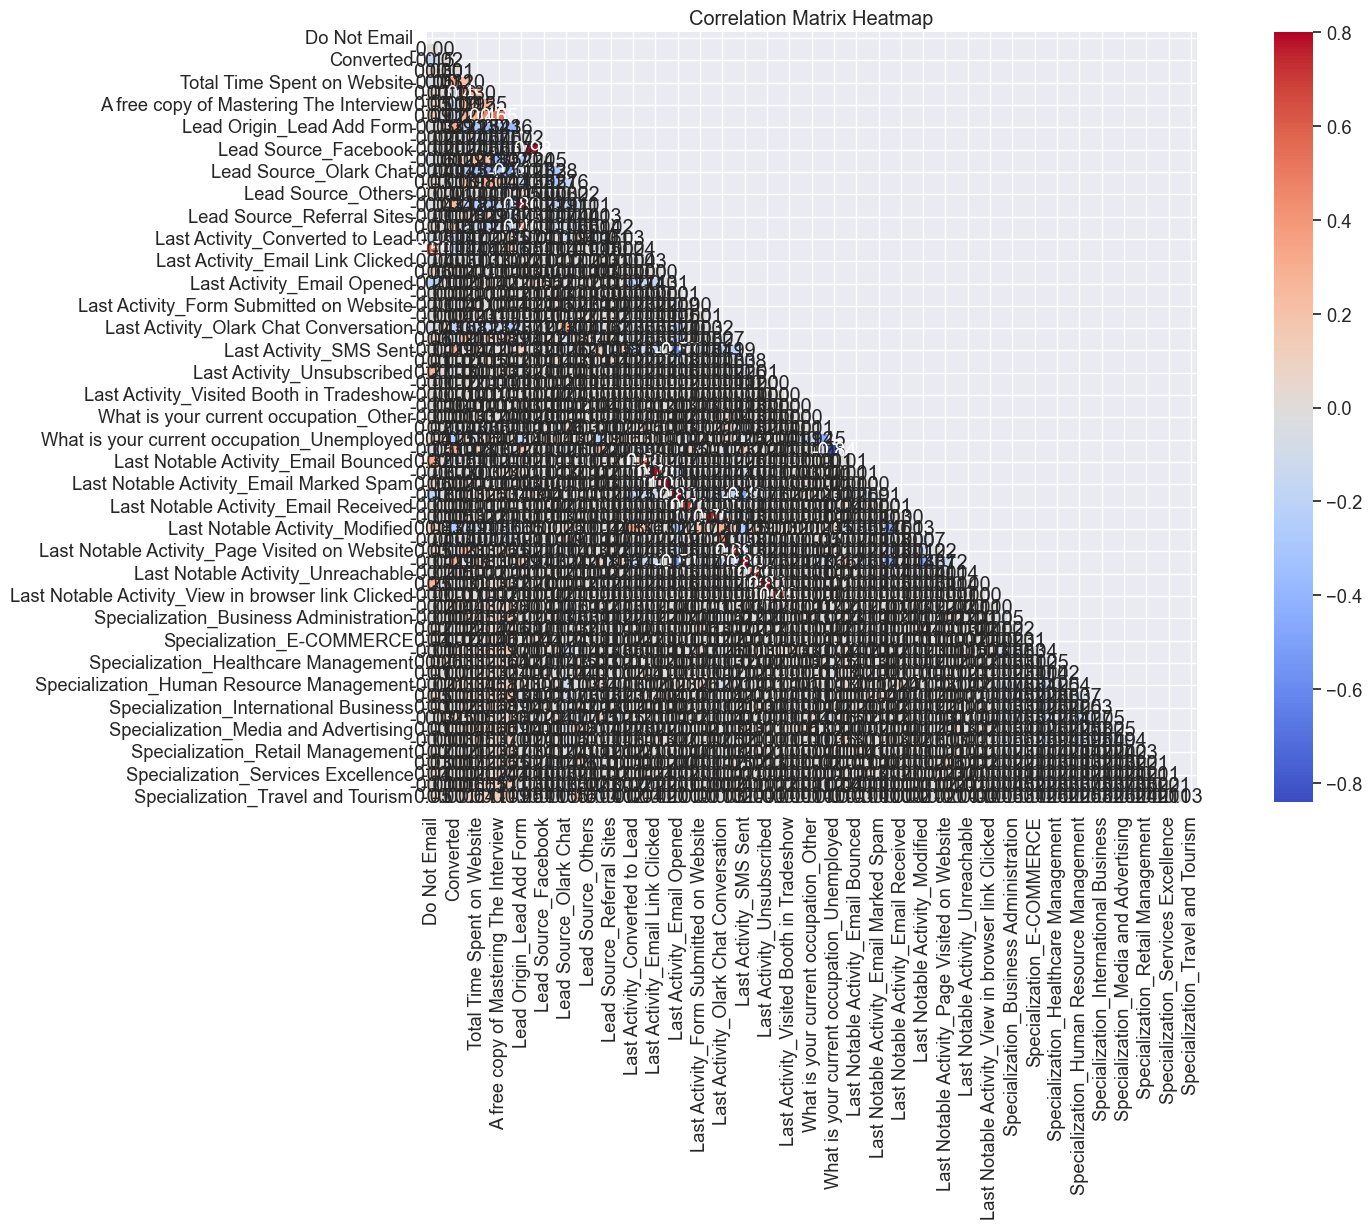

In [627]:


# Calculate the correlation matrix
correlation_matrix = leads.corr()

# Create a mask to hide the lower triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure size
plt.figure(figsize=(20, 10))

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,
    vmax=0.8,
    square=True,
    annot=True,
    fmt=".2f",  # Format for annotation values (2 decimal places)
    cmap="coolwarm",  # Colormap
)

# Set the tick labels to be more readable
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Set the title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()

In [628]:


# Calculate the correlation matrix
correlation_mat = leads.corr()

# Create a DataFrame with correlation values and pairs
corr_pairs = pd.DataFrame(correlation_mat.unstack(), columns=['Correlation'])

# Reset the index to have pairs as columns
corr_pairs.reset_index(inplace=True)

# Filter for strong correlation pairs (magnitude greater than 0.5)
strong_pairs = corr_pairs[abs(corr_pairs['Correlation']) > 0.5]

# Rename the columns for clarity
strong_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Display strong correlation pairs
print("Strong correlation pairs (magnitude greater than 0.5):")
print(strong_pairs)

Strong correlation pairs (magnitude greater than 0.5):
                                   Feature 1  \
0                               Do Not Email   
19                              Do Not Email   
70                               Do Not Call   
140                                Converted   
210                              TotalVisits   
...                                      ...   
4480        Specialization_Retail Management   
4550   Specialization_Rural and Agribusiness   
4620      Specialization_Services Excellence   
4690  Specialization_Supply Chain Management   
4760       Specialization_Travel and Tourism   

                                   Feature 2  Correlation  
0                               Do Not Email     1.000000  
19               Last Activity_Email Bounced     0.586336  
70                               Do Not Call     1.000000  
140                                Converted     1.000000  
210                              TotalVisits     1.000000  
...     

Cannot see anything clearly -> try another method as below:

In [629]:
# Remove duplicated pairs in the correlation table
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Get top pairs
def get_top_abs_correlations(df, n=10):
    corr_list = df.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    corr_list = corr_list.drop(labels=labels_to_drop).sort_values(ascending=False)
    return corr_list[0:n]

In [630]:
# Get top 10 correlation pairs
print("Top 10 correlation pairs:")
get_top_abs_correlations(correlation_mat, 10)

Top 10 correlation pairs:


Last Activity_Email Marked Spam             Last Notable Activity_Email Marked Spam                 1.000000
Lead Origin_Lead Import                     Lead Source_Facebook                                    0.981903
Last Activity_SMS Sent                      Last Notable Activity_SMS Sent                          0.890417
Last Activity_Unsubscribed                  Last Notable Activity_Unsubscribed                      0.868855
Last Activity_Email Opened                  Last Notable Activity_Email Opened                      0.866382
Lead Origin_Lead Add Form                   Lead Source_Reference                                   0.863011
What is your current occupation_Unemployed  What is your current occupation_Working Professional    0.842065
Last Activity_Email Link Clicked            Last Notable Activity_Email Link Clicked                0.781849
Last Activity_Had a Phone Conversation      Last Notable Activity_Had a Phone Conversation          0.751220
Last Activity_Email

## Feature Selection

In [631]:
# Create object of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [632]:
## For the Subjective Questions
# Import RFE and select 3 variables
# from sklearn.feature_selection import RFE
# rfe = RFE(logreg, 3)             # running RFE with 3 variables as output
# rfe = rfe.fit(X_train, y_train)

In [633]:
# All of the columns selected by RFE
# col = X_train.columns[rfe.support_]
# col

In [634]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # Import the Logistic Regression model

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Initialize RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE to your data
rfe = rfe.fit(X_train, y_train)

In [635]:
# the RFE Ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 32),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('A free copy of Mastering The Interview', False, 2),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Others', False, 37),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 39),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Marked Spam', False, 54),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Email Received', False, 45),
 ('Last Activity_Form Submitted on Website', False,

In [636]:
# columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [637]:
# columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Email Bounced',
       'Last Notab

In [638]:
# New X_train = columns selected by RFE
X_train = X_train[col]

## Analyzing  the model with StatsModels

In [639]:
# Import statsmodels
import statsmodels.api as sm

# Assess the model with StatsModels
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4457
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2048.8
Date:                Wed, 13 Sep 2023   Deviance:                       4097.6
Time:                        22:20:33   Pearson chi2:                 4.62e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3735
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0518     61.780      0.001      0.999    -121.035     121.139
Do Not Email                                            -0.4066      0.049     -8.358      0.000      -0.502      -0.311
TotalVisits                                              0.2154      0.061      3.545      0.000       0.096       0.335
Total Time Spent on Website                              1.1149      0.047     23.965      0.000       1.024       1.206
Lead Origin_Lead Add Form                                0.9252      0.326      2.838      0.005       0.286       1.564
Lead Source_Olark Chat                                   0.5451      0.045     12.149      0.000       0.457       0.633
Lead Source_Reference                                    0.1838      0.292      0.629      0.529      -0.389       0.756
Lead Source_Welingak Website                             0.3600      0.191      1.885      0.059      -0.014       0.734
Last Activity_Converted to Lead                         -0.1819      0.047     -3.869      0.000      -0.274      -0.090
Last Activity_Olark Chat Conversation                   -0.2888      0.045     -6.365      0.000      -0.378      -0.200
Last Activity_View in browser link Clicked              -0.6863   1101.739     -0.001      1.000   -2160.056    2158.683
What is your current occupation_Housewife                0.6887   1107.943      0.001      1.000   -2170.840    2172.218
What is your current occupation_Working Professional     0.7533      0.056     13.343      0.000       0.643       0.864
Last Notable Activity_Had a Phone Conversation           1.0196    954.284      0.001      0.999   -1869.342    1871.382
Last Notable Activity_SMS Sent                           0.5365      0.040     13.421      0.000       0.458       0.615
Last Notable Activity_Unreachable                        0.2029      0.064      3.171      0.002       0.078       0.328
========================================================================================================================
"""

Insights based on p-values greater than 0.05 in a statistical analysis:

1. Lead Source_Reference and Lead Source_Welingak Website:
   - The p-values for these two variables indicate that they are not statistically significant in predicting the outcome (conversion). In other words, these lead sources may not have a strong influence on whether a customer converts or not.

2. Last Activity_View in browser link Clicked:
   - The p-value for this last activity suggests that it is not a statistically significant predictor of conversion. Clicking on a "View in browser link" may not strongly correlate with whether a customer converts or not.

3. What is your current occupation_Housewife:
   - The p-value for the occupation "Housewife" indicates that it is not a statistically significant factor in predicting conversion. This suggests that being a housewife may not strongly influence the likelihood of conversion.

4. Last Notable Activity_Had a Phone Conversation:
   - The p-value for this last notable activity suggests that having a phone conversation as the last notable activity is not a statistically significant predictor of conversion. It may not strongly affect the likelihood of a customer converting.

In summary, these variables with p-values greater than 0.05 do not appear to have a strong statistically significant impact on whether a customer converts or not. Therefore, they may not be reliable predictors of conversion outcomes in the analyzed dataset.

## Checking VIFs

In [640]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [641]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,61.35
5,Lead Source_Reference,48.42
6,Lead Source_Welingak Website,16.01
4,Lead Source_Olark Chat,1.36
2,Total Time Spent on Website,1.29
1,TotalVisits,1.14
8,Last Activity_Olark Chat Conversation,1.14
11,What is your current occupation_Working Profes...,1.08
13,Last Notable Activity_SMS Sent,1.08
7,Last Activity_Converted to Lead,1.07


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.

Drop "Lead Source_Reference" and "Lead Source_Welingak Website" because they have high p-value and high VIF.

In [642]:
# Drop "Lead Source_Reference" and "Lead Source_Welingak Website"
X_train = X_train.drop(["Lead Source_Reference", "Lead Source_Welingak Website"], 1)

In [643]:
# View X_train
X_train

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
338,-0.269081,-0.120283,0.524169,-0.314670,-0.406383,-0.219721,-0.268603,-0.029917,-0.029917,2.914930,-0.042329,-0.639389,-0.059915
507,-0.269081,-0.688818,-0.941997,3.177933,-0.406383,-0.219721,-0.268603,-0.029917,-0.029917,-0.343061,-0.042329,-0.639389,-0.059915
5182,-0.269081,1.016788,0.554235,-0.314670,-0.406383,-0.219721,-0.268603,-0.029917,-0.029917,-0.343061,-0.042329,1.563992,-0.059915
5956,-0.269081,0.258741,0.655045,-0.314670,-0.406383,-0.219721,-0.268603,-0.029917,-0.029917,-0.343061,-0.042329,-0.639389,-0.059915
5360,-0.269081,-0.499306,-0.613038,-0.314670,-0.406383,4.551219,-0.268603,-0.029917,-0.029917,-0.343061,-0.042329,-0.639389,-0.059915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,-0.269081,-0.120283,0.522400,-0.314670,-0.406383,-0.219721,-0.268603,-0.029917,-0.029917,-0.343061,-0.042329,-0.639389,-0.059915
79,-0.269081,0.637764,1.946120,-0.314670,-0.406383,4.551219,-0.268603,-0.029917,-0.029917,-0.343061,-0.042329,-0.639389,-0.059915
3927,-0.269081,-0.309794,1.072433,-0.314670,-0.406383,-0.219721,-0.268603,-0.029917,-0.029917,-0.343061,-0.042329,-0.639389,-0.059915
5955,-0.269081,-0.309794,-0.400806,-0.314670,-0.406383,-0.219721,-0.268603,-0.029917,-0.029917,-0.343061,-0.042329,-0.639389,-0.059915


In [644]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2053.5
Date:                Wed, 13 Sep 2023   Deviance:                       4107.0
Time:                        22:20:36   Pearson chi2:                 4.74e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3722
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0450     61.673      0.001      0.999    -120.833     120.923
Do Not Email                                            -0.3978      0.048     -8.327      0.000      -0.491      -0.304
TotalVisits                                              0.2148      0.061      3.532      0.000       0.096       0.334
Total Time Spent on Website                              1.1145      0.047     23.966      0.000       1.023       1.206
Lead Origin_Lead Add Form                                1.2263      0.067     18.248      0.000       1.095       1.358
Lead Source_Olark Chat                                   0.5450      0.045     12.147      0.000       0.457       0.633
Last Activity_Converted to Lead                         -0.1814      0.047     -3.860      0.000      -0.274      -0.089
Last Activity_Olark Chat Conversation                   -0.2890      0.045     -6.364      0.000      -0.378      -0.200
Last Activity_View in browser link Clicked              -0.6861   1103.083     -0.001      1.000   -2162.688    2161.316
What is your current occupation_Housewife                0.6877   1098.498      0.001      1.000   -2152.328    2153.704
What is your current occupation_Working Professional     0.7499      0.057     13.270      0.000       0.639       0.861
Last Notable Activity_Had a Phone Conversation           1.0197    955.109      0.001      0.999   -1870.960    1872.999
Last Notable Activity_SMS Sent                           0.5373      0.040     13.459      0.000       0.459       0.616
Last Notable Activity_Unreachable                        0.2028      0.064      3.168      0.002       0.077       0.328
========================================================================================================================
"""

Insights based on p-values greater than 0.05 in a statistical analysis:

1. Last Activity_View in browser link Clicked:
   - The p-value for the "View in browser link Clicked" activity suggests that it is not a statistically significant predictor of the conversion outcome. This activity may not have a strong influence on whether a customer converts or not.

2. What is your current occupation_Housewife:
   - The p-value for the occupation "Housewife" indicates that it is not a statistically significant factor in predicting conversion. This suggests that being a housewife may not strongly influence the likelihood of conversion.

3. Last Notable Activity_Had a Phone Conversation:
   - The p-value for the "Had a Phone Conversation" notable activity suggests that it is not a statistically significant predictor of conversion. Having a phone conversation as the last notable activity may not strongly affect the likelihood of a customer converting.

In summary, these variables with p-values greater than 0.05 do not appear to have a strong statistically significant impact on whether a customer converts or not. Therefore, they may not be reliable predictors of conversion outcomes in the analyzed dataset.

In [645]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.36
2,Total Time Spent on Website,1.29
3,Lead Origin_Lead Add Form,1.25
1,TotalVisits,1.14
6,Last Activity_Olark Chat Conversation,1.14
11,Last Notable Activity_SMS Sent,1.08
5,Last Activity_Converted to Lead,1.07
9,What is your current occupation_Working Profes...,1.06
0,Do Not Email,1.02
7,Last Activity_View in browser link Clicked,1.00


VIFs are less than 5 -> Drop variables with high p-value, starting with "Last Notable Activity_Had a Phone Conversation"

In [646]:
# Drop "Last Notable Activity_Had a Phone Conversation"
X_train = X_train.drop("Last Notable Activity_Had a Phone Conversation", 1)

In [647]:
# Let's re-run the model using the selected variables
logm3 = sm.GLM(y_train,sm.add_constant(X_train), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4460
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2061.8
Date:                Wed, 13 Sep 2023   Deviance:                       4123.5
Time:                        22:20:38   Pearson chi2:                 4.74e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3699
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0074     28.253      0.000      1.000     -55.367      55.382
Do Not Email                                            -0.3992      0.048     -8.365      0.000      -0.493      -0.306
TotalVisits                                              0.2213      0.061      3.641      0.000       0.102       0.340
Total Time Spent on Website                              1.1089      0.046     23.921      0.000       1.018       1.200
Lead Origin_Lead Add Form                                1.2236      0.067     18.214      0.000       1.092       1.355
Lead Source_Olark Chat                                   0.5419      0.045     12.099      0.000       0.454       0.630
Last Activity_Converted to Lead                         -0.1831      0.047     -3.901      0.000      -0.275      -0.091
Last Activity_Olark Chat Conversation                   -0.2906      0.045     -6.404      0.000      -0.380      -0.202
Last Activity_View in browser link Clicked              -0.6565    669.122     -0.001      0.999   -1312.112    1310.799
What is your current occupation_Housewife                0.6576    666.396      0.001      0.999   -1305.455    1306.770
What is your current occupation_Working Professional     0.7489      0.056     13.267      0.000       0.638       0.859
Last Notable Activity_SMS Sent                           0.5326      0.040     13.364      0.000       0.454       0.611
Last Notable Activity_Unreachable                        0.2019      0.064      3.155      0.002       0.076       0.327
========================================================================================================================
"""

Insights based on p-values greater than 0.05 in a statistical analysis:

1. Last Activity_View in browser link Clicked:
   - The p-value for the "View in browser link Clicked" activity suggests that it is not a statistically significant predictor of the conversion outcome. This activity may not have a strong influence on whether a customer converts or not.

2. What is your current occupation_Housewife:
   - The p-value for the occupation "Housewife" indicates that it is not a statistically significant factor in predicting conversion. This suggests that being a housewife may not strongly influence the likelihood of conversion.

In summary, both the "View in browser link Clicked" activity and the occupation "Housewife" have p-values greater than 0.05, indicating that they are not statistically significant predictors of conversion. These factors may not be reliable in determining whether a customer will convert or not in the analyzed dataset.

In [648]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.36
2,Total Time Spent on Website,1.29
3,Lead Origin_Lead Add Form,1.25
1,TotalVisits,1.14
6,Last Activity_Olark Chat Conversation,1.14
10,Last Notable Activity_SMS Sent,1.08
5,Last Activity_Converted to Lead,1.07
9,What is your current occupation_Working Profes...,1.06
0,Do Not Email,1.02
7,Last Activity_View in browser link Clicked,1.00


VIFs are less than 5 -> Drop variables with high p-value, "Last Activity_View in browser link Clicked"

In [649]:
# Drop "Last Activity_View in browser link Clicked"
X_train = X_train.drop("Last Activity_View in browser link Clicked", 1)

In [650]:
# Let's re-run the model using the selected variables
logm4 = sm.GLM(y_train,sm.add_constant(X_train), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4461
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2063.5
Date:                Wed, 13 Sep 2023   Deviance:                       4127.0
Time:                        22:20:40   Pearson chi2:                 4.74e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3694
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0235     12.091      0.002      0.998     -23.674      23.721
Do Not Email                                            -0.3988      0.048     -8.356      0.000      -0.492      -0.305
TotalVisits                                              0.2224      0.061      3.656      0.000       0.103       0.342
Total Time Spent on Website                              1.1109      0.046     23.965      0.000       1.020       1.202
Lead Origin_Lead Add Form                                1.2250      0.067     18.236      0.000       1.093       1.357
Lead Source_Olark Chat                                   0.5424      0.045     12.115      0.000       0.455       0.630
Last Activity_Converted to Lead                         -0.1822      0.047     -3.883      0.000      -0.274      -0.090
Last Activity_Olark Chat Conversation                   -0.2897      0.045     -6.385      0.000      -0.379      -0.201
What is your current occupation_Housewife                0.6277    404.128      0.002      0.999    -791.449     792.704
What is your current occupation_Working Professional     0.7433      0.056     13.283      0.000       0.634       0.853
Last Notable Activity_SMS Sent                           0.5340      0.040     13.401      0.000       0.456       0.612
Last Notable Activity_Unreachable                        0.2022      0.064      3.159      0.002       0.077       0.328
========================================================================================================================
"""

Insights: p-values > 0.05:
 - What is your current occupation_Housewife

In [651]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.36
2,Total Time Spent on Website,1.28
3,Lead Origin_Lead Add Form,1.25
1,TotalVisits,1.14
6,Last Activity_Olark Chat Conversation,1.14
9,Last Notable Activity_SMS Sent,1.08
5,Last Activity_Converted to Lead,1.07
8,What is your current occupation_Working Profes...,1.06
0,Do Not Email,1.02
7,What is your current occupation_Housewife,1.00


VIFs are less than 5 -> Drop variables with high p-value, "What is your current occupation_Housewife"

In [652]:
# Drop "What is your current occupation_Housewife"
X_train = X_train.drop("What is your current occupation_Housewife", 1)

In [653]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4462
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2065.3
Date:                Wed, 13 Sep 2023   Deviance:                       4130.6
Time:                        22:20:41   Pearson chi2:                 4.74e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3689
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0066      0.043      0.156      0.876      -0.077       0.090
Do Not Email                                            -0.3994      0.048     -8.366      0.000      -0.493      -0.306
TotalVisits                                              0.2215      0.061      3.644      0.000       0.102       0.341
Total Time Spent on Website                              1.1126      0.046     24.008      0.000       1.022       1.203
Lead Origin_Lead Add Form                                1.2262      0.067     18.258      0.000       1.095       1.358
Lead Source_Olark Chat                                   0.5421      0.045     12.110      0.000       0.454       0.630
Last Activity_Converted to Lead                         -0.1830      0.047     -3.899      0.000      -0.275      -0.091
Last Activity_Olark Chat Conversation                   -0.2903      0.045     -6.398      0.000      -0.379      -0.201
What is your current occupation_Working Professional     0.7428      0.056     13.272      0.000       0.633       0.852
Last Notable Activity_SMS Sent                           0.5327      0.040     13.370      0.000       0.455       0.611
Last Notable Activity_Unreachable                        0.2020      0.064      3.156      0.002       0.077       0.327
========================================================================================================================
"""

Insights: p-values > 0.05: No more

In [654]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.36
2,Total Time Spent on Website,1.28
3,Lead Origin_Lead Add Form,1.25
1,TotalVisits,1.14
6,Last Activity_Olark Chat Conversation,1.14
8,Last Notable Activity_SMS Sent,1.08
5,Last Activity_Converted to Lead,1.07
7,What is your current occupation_Working Profes...,1.06
0,Do Not Email,1.02
9,Last Notable Activity_Unreachable,1.00


## Model Evaluation

In [655]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

338     0.880283
507     0.890952
5182    0.737742
5956    0.451339
5360    0.066159
3316    0.735953
3702    0.407270
1145    0.239369
3227    0.988529
5937    0.190516
dtype: float64

In [656]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.88028341, 0.89095248, 0.7377423 , 0.4513385 , 0.06615909,
       0.73595317, 0.40726987, 0.23936885, 0.98852902, 0.19051555])

### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [657]:
# Create dataframe with conversion flag and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,1,0.880283
1,1,0.890952
2,1,0.737742
3,0,0.451339
4,0,0.066159


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [658]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,1,0.880283,1
1,1,0.890952,1
2,1,0.737742,1
3,0,0.451339,0
4,0,0.066159,0


### Evaluate Model

In [659]:
# import metrics
from sklearn import metrics

In [660]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7864967583277442


### Metrics beyond simply accuracy

In [661]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1959  390]
 [ 565 1559]]


In [662]:
#Predicted     not_converted    converted
#Actual
#not_converted    1959         390
#converted            565        1559 

In [663]:
# Evaluate other metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [664]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7339924670433146

In [665]:
# Let us calculate specificity
TN / float(TN+FP)

0.8339719029374202

## Finding the optimal cut off

In [666]:
import matplotlib.pyplot as plt
from sklearn import metrics

def draw_roc(actual, probs, model_name="Model"):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Example usage:
# draw_roc(y_test, predicted_probs, model_name="Logistic Regression")

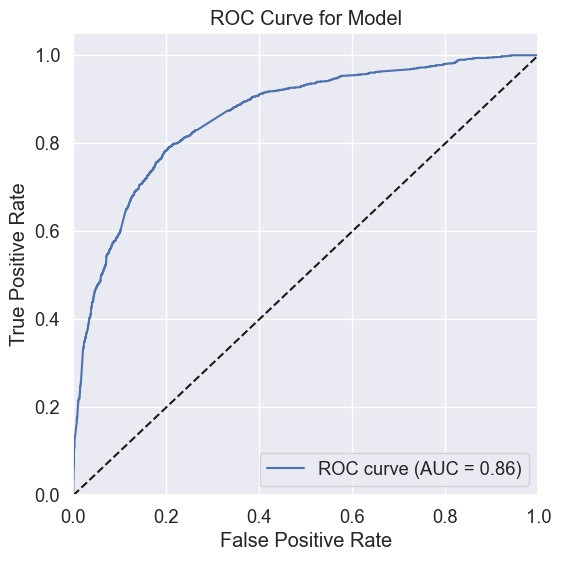

In [667]:
# Draw the ROC
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area below the ROC curve is 0.86, which is very good -> We have a good model.
Check the sensitivity and specificity to find the optimal cutoff point.

In [668]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.880283,1,1,1,1,1,1,1,1,1,1,0
1,1,0.890952,1,1,1,1,1,1,1,1,1,1,0
2,1,0.737742,1,1,1,1,1,1,1,1,1,0,0
3,0,0.451339,0,1,1,1,1,1,0,0,0,0,0
4,0,0.066159,0,1,0,0,0,0,0,0,0,0,0


In [669]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i, accuracy, sensi, speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.474849     1.000000     0.000000
0.1          0.1  0.549072     0.991525     0.149000
0.2          0.2  0.708473     0.929849     0.508301
0.3          0.3  0.754304     0.896893     0.625372
0.4          0.4  0.786944     0.806026     0.769689
0.5          0.5  0.786497     0.733992     0.833972
0.6          0.6  0.779566     0.672787     0.876117
0.7          0.7  0.746926     0.550847     0.924223
0.8          0.8  0.715627     0.449153     0.956577
0.9          0.9  0.635815     0.249529     0.985100


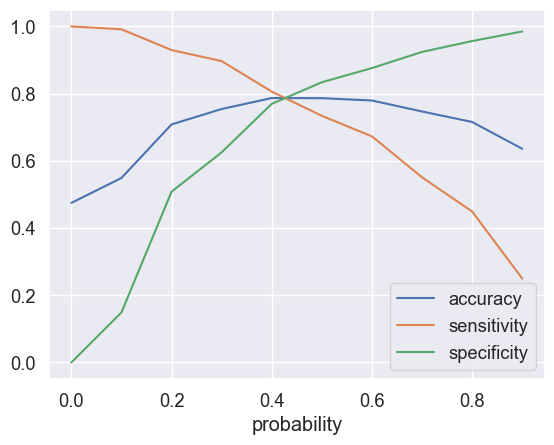

In [670]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

### Creating new column 'predicted' with 1 if Converted_Prob > 0.42 else 0

In [671]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.42 else 0
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x >= 0.42 else 0)

# View top rows of y_train_pred_final
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.880283,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.890952,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.737742,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.451339,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.066159,0,1,0,0,0,0,0,0,0,0,0,0


### Evaluate Model

In [672]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7914151576123407

### Metrics beyond simply accuracy

In [673]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion2)

[[1850  499]
 [ 434 1690]]


In [674]:
#Predicted     not_converted    converted
#Actual
#not_converted    1959         390
#converted            565        1559 

In [675]:
# Evaluate other metrics

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [676]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.795668549905838

In [677]:
# Let us calculate specificity
TN / float(TN+FP)

0.787569178373776

This cutoff point seems good to go!

## Precision and Recall

In [678]:
#Looking at the confusion matrix again with the original predicted value
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[1959,  390],
       [ 565, 1559]])

### Precision
TP / TP + FP

In [679]:
# Calculate Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7998973832734736

### Recall
TP / TP + FN

In [680]:
# Calculate Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7339924670433146

### Precision and recall tradeoff

In [681]:
# import precision_recall_curve
from sklearn.metrics import precision_recall_curve

In [682]:
# Calculate precision & recall
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

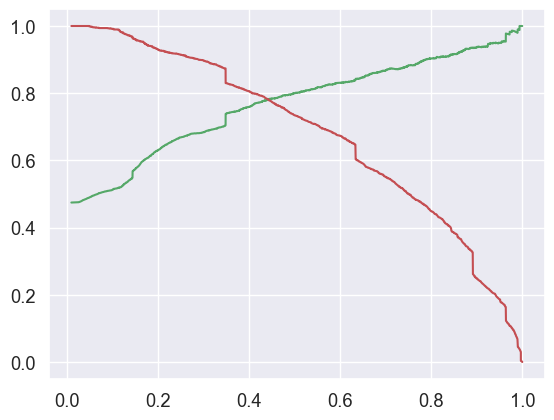

In [683]:
# Plot precision & recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

## Making predictions on the test set

In [684]:
# Scale X_test
X_test[['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism']] = scaler.transform(X_test[['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism']])

In [685]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()
X_test.shape

(1918, 15)

In [686]:
# Drop the required columns on X_test
X_test.drop(["Lead Source_Reference", "Lead Source_Welingak Website", "Last Activity_View in browser link Clicked", "What is your current occupation_Housewife", "Last Notable Activity_Had a Phone Conversation"], 1, inplace=True)

In [687]:
X_test.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [688]:
# Make prediction on test set
y_test_pred = res.predict(sm.add_constant(X_test))

In [689]:
# View y_test_pred
y_test_pred[:10]

1990    0.977066
2837    0.177690
3958    0.053736
4689    0.043656
3463    0.847318
4969    0.564939
543     0.687802
2580    0.143491
3302    0.907243
1195    0.384449
dtype: float64

In [690]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [691]:
# Let's see the head
y_pred_1.head()

,0
1990,0.977066
2837,0.177690
3958,0.053736
4689,0.043656
3463,0.847318


In [692]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [693]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [694]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [695]:
# Check y_pred_final
y_pred_final.head()

,Converted,0
0,1,0.977066
1,0,0.177690
2,0,0.053736
3,0,0.043656
4,1,0.847318


In [696]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [697]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_Prob
0,1,0.977066
1,0,0.177690
2,0,0.053736
3,0,0.043656
4,1,0.847318


In [698]:
# Calculate final_predicted with cutoff point 0.42
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [699]:
# View y_pred_final
y_pred_final

,Converted,Converted_Prob,final_predicted
0,1,0.977066,1
1,0,0.177690,0
2,0,0.053736,0
3,0,0.043656,0
4,1,0.847318,1
...,...,...,...
1913,1,0.505135,1
1914,1,0.347998,0
1915,0,0.597014,1
1916,1,0.756680,1


In [700]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7893639207507821

In [701]:
# Calculate confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[777, 200],
       [204, 737]])

In [702]:
# Calculate TP, TN, FP, FN
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [703]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7832093517534537

In [704]:
# Let's calculate specificity
TN / float(TN+FP)

0.7952917093142272

## Assigning a lead score between 0 and 100 to each of the leads

In [705]:
# Removing index for both dataframes to append them side by side 
X_test_data.reset_index(drop=True, inplace=True)
y_pred_final.reset_index(drop=True, inplace=True)

In [706]:
# Assign Lead Score to test data
test_data = pd.DataFrame({"Prospect ID": X_test_data["Prospect ID"], "Lead Score": y_pred_final['Converted_Prob'] * 100})

In [707]:
# Removing index for both dataframes to append them side by side 
X_train_data.reset_index(drop=True, inplace=True)
y_train_pred_final.reset_index(drop=True, inplace=True)

In [708]:
# Assign Lead Score to train data
train_data = pd.DataFrame({"Prospect ID": X_train_data["Prospect ID"], "Lead Score": y_train_pred_final['Converted_Prob'] * 100})

In [709]:
# Merge train & test data to a final result with lead score
final_data = pd.concat([train_data, test_data],axis=0)

In [710]:
# Top 20 potential leads
final_data.sort_values(by=['Lead Score'], ascending=False).head(20)

,Prospect ID,Lead Score
2943,f787f694-b4c4-4763-a4ae-9f39a0a052b6,99.978674
1663,4cb2a48d-e9d2-4845-acb1-baaad08c8c07,99.974689
617,f04a9a8b-2f07-4037-84aa-bb3ebc3989d3,99.949035
2152,90866f3e-deb3-46d3-9c98-188d4f1ffdeb,99.942433
2198,240134a6-7917-4a71-a0ac-909d9f055148,99.903209
754,cc65b148-cb5e-4fbe-890e-1508e6dd56cd,99.901814
569,234320c2-fce5-4dfd-862e-c609eb4765b3,99.894318
1287,f33166e8-d8d3-4e8c-b9d0-8a1922c35910,99.835457
450,200f37a6-28dd-4c5c-9f2d-5e2f9feb7808,99.817045
1508,d41b76fd-e215-463c-a9be-6dcfc2440e90,99.804536


**Conclusions**--
Based on the analysis, it can be concluded that the following three factors contribute most to the probability of a lead getting converted:

1. **Total Time Spent on Website (Time_on_website):**
   - Customers who spend more time on the website are more likely to convert. This suggests that engaging and informative website content can positively impact conversion rates.

2. **Lead Source => Welingak_Website (Lead_Source_Welingak_Website):**
   - Leads originating from the "Welingak Website" source are more likely to convert. This source should be a focus area for lead generation and conversion efforts.

3. **What is your current occupation => Working_Professional (Occupation_Working_Professional):**
   - Working professionals are more likely to convert. Therefore, targeting this demographic group with tailored marketing strategies can improve the overall conversion rate.

To improve the overall conversion rate, X Education Company should consider the following key aspects:

1. **Total Time Spent on Website:**
   - Encourage and engage website visitors to spend more time on the site by providing valuable content and interactive features that pique their interest.

2. **Lead Source:**
   - While leads from Direct Traffic, Google, Olark Chat, and Organic Search may not be potential candidates, more attention should be directed towards leads from reference sources, as they are more likely to convert. Strengthening referral programs and partnerships could be beneficial.

3. **What is your current occupation:**
   - Targeting working professionals, unemployed individuals, and students with specific marketing campaigns and course offerings can lead to higher conversion rates.

4. **Last Notable Activity:**
   - Focus on customers who have had a phone conversation, opened emails, or received SMS messages, as these activities are associated with a higher likelihood of conversion. Fine-tuning communication strategies for these activities can be beneficial.

5. **Specialization:**
   - Pay special attention to customers interested in Finance Management and Marketing Management, as they are more likely to convert. Tailoring course offerings or promotions related to these specializations can attract more conversions.

These insights provide a roadmap for X Education Company to optimize its marketing and conversion strategies and enhance the overall success rate of converting leads into customers.